In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
X_train = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_2_nacho/intento_2/X_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_2_nacho/intento_2/y_train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_2_nacho/intento_2/X_test.csv')
id_test = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_2_nacho/intento_2/id_test.csv')

In [ ]:
id_test.columns = ['id']
id = list(id_test.id) 

In [5]:
import xgboost as xgb

In [6]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score

In [8]:
clf_xgb = xgb.XGBClassifier(objective = 'reg:logistic')
param_dist = {'n_estimators': stats.randint(70, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.3, 0.9),
             }

clf_random = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 100, scoring = 'roc_auc',\
                         verbose = 2, n_jobs = -1, return_train_score=True, cv=5)

clf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 24.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='reg:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd4c503c2b0>,
                                        'max_dep

In [9]:
estimator = clf_random.best_estimator_
cvs = cross_val_score(estimator, X_train, y_train, cv=10)
results = pd.DataFrame(clf_random.cv_results_)

print("##### Results")
print("Score best parameters: ", clf_random.best_score_)
print("Best parameters: ", clf_random.best_params_)
print("Cross-validation Score: ", cvs.mean())
print("Parameter combinations evaluated: ",results.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Results
Score best parameters:  0.7385802548414693
Best parameters:  {'colsample_bytree': 0.8405594163418579, 'learning_rate': 0.03936722895726702, 'max_depth': 3, 'n_estimators': 146, 'subsample': 0.4040676848904611}
Cross-validation Score:  0.6966194265366051
Parameter combinations evaluated:  100


In [10]:
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
results[[ 'rank_test_score',
       'param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_n_estimators', 'param_subsample', 'params',
       'mean_test_score', 'std_test_score',
       'mean_train_score', 'std_train_score']].sort_values(by='rank_test_score')

,rank_test_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,mean_train_score,std_train_score
65,1,0.840559,0.0393672,3,146,0.404068,"{'colsample_bytree': 0.8405594163418579, 'lear...",0.738580,0.019570,0.781949,0.004338
91,2,0.413012,0.0181841,3,126,0.448426,"{'colsample_bytree': 0.41301170159985556, 'lea...",0.733551,0.018827,0.758566,0.004448
94,3,0.385724,0.0818049,8,75,0.716106,"{'colsample_bytree': 0.38572444865669175, 'lea...",0.731999,0.016995,0.944986,0.002058
34,4,0.407663,0.0775888,3,645,0.38655,"{'colsample_bytree': 0.4076630012944317, 'lear...",0.724483,0.017064,0.872687,0.001210
95,5,0.629457,0.182818,3,298,0.938112,"{'colsample_bytree': 0.6294570126836345, 'lear...",0.722025,0.018201,0.888566,0.001962
...,...,...,...,...,...,...,...,...,...,...,...
58,96,1.1357,0.609226,4,202,0.546426,"{'colsample_bytree': 1.1356967380443717, 'lear...",NaN,NaN,NaN,NaN
67,97,0.820962,0.334191,3,319,1.06518,"{'colsample_bytree': 0.8209624524610704, 'lear...",NaN,NaN,NaN,NaN
68,98,1.11924,0.385262,5,583,0.500373,"{'colsample_bytree': 1.1192351950792954, 'lear...",NaN,NaN,NaN,NaN
70,99,0.842646,0.333394,6,518,1.19982,"{'colsample_bytree': 0.8426455929214594, 'lear...",NaN,NaN,NaN,NaN


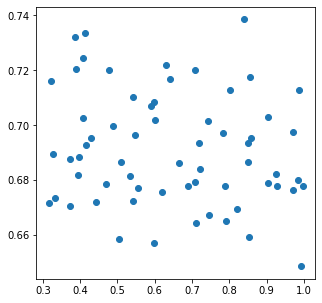

In [39]:
a = ['param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_n_estimators', 'param_subsample'] 
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_colsample_bytree, results.mean_test_score)

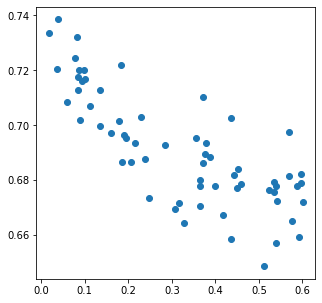

In [40]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_learning_rate, results.mean_test_score)

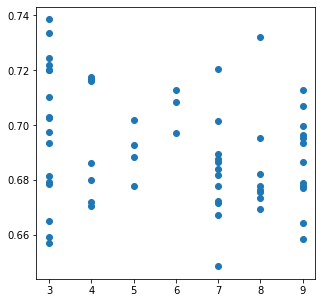

In [41]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_max_depth, results.mean_test_score)

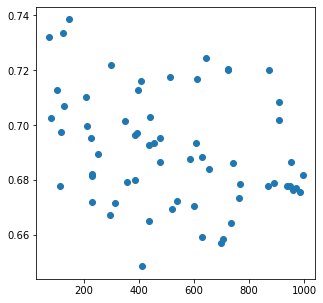

In [42]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_n_estimators, results.mean_test_score)

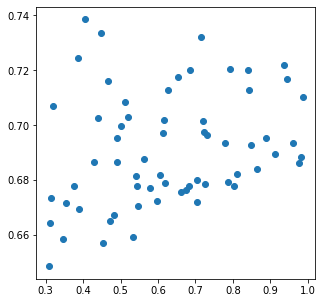

In [43]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(results.param_subsample, results.mean_test_score)

In [44]:
# GridSearch

from sklearn.model_selection import GridSearchCV

#Objective function
objective = ['binary:logistic']

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]

# Col sample by tree
import random

randomFloatList = []
for i in range(0, 2):
    x = random.uniform(0.3, 0.4)
    y = random.uniform(0.8,0.9)
    randomFloatList.append(x)
    randomFloatList.append(y)
colsample_bytree = randomFloatList

# Maximum number of levels in tree
max_depth = [3,4]

#Learning rate
randomFloatList = []
for i in range(0, 3):
    x = random.uniform(0.01, 0.03)
    randomFloatList.append(x)
learning_rate = randomFloatList

# Subsample
randomFloatList = []
for i in range(0, 2):
    x = random.uniform(0.625, 0.675)
    y = random.uniform(0.355,0.445)
    randomFloatList.append(x)
    randomFloatList.append(y)
subsample = randomFloatList

combinations = len(n_estimators)*len(colsample_bytree)*len(max_depth)*len(learning_rate)*len(subsample)*len(objective)

# Create the random grid
grid = {       'objective': objective, 
               'n_estimators': n_estimators,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'subsample': subsample
       }

from pprint import pprint
pprint(grid)
print("With this grid ww have ",combinations,"combinations")

{'colsample_bytree': [0.3369486299315777,
                      0.8677217419011616,
                      0.3679580461411956,
                      0.8591581399334879],
 'learning_rate': [0.02037634792772786,
                   0.029984956306127186,
                   0.01323444557332439],
 'max_depth': [3, 4],
 'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200],
 'objective': ['binary:logistic'],
 'subsample': [0.63313098199269,
               0.4088235842903493,
               0.6311629735135249,
               0.4094771815461732]}
With this grid ww have  960 combinations


In [45]:
# Using GridSearchCV to search for best hyperparameters
# First create the base model to tune
xgb_clf = xgb.XGBClassifier()

xgb_clf_search = GridSearchCV(estimator = xgb_clf, param_grid = grid, cv = 5, n_jobs = -1,
                              scoring='roc_auc', verbose=2)

# Fitting the grid search model
xgb_clf_search.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 66.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
                         'learning_rate': [0.02037634792772786,
                                           0.029984956306127186,
                                           0.01323444557332439],
                         'max_depth': [3, 4],
                         'n_estimators': [100, 111, 122, 133, 144, 155, 166,


In [46]:
estimator = xgb_clf_search.best_estimator_
cvs = cross_val_score(estimator, X_train, y_train, cv=10)
results = pd.DataFrame(xgb_clf_search.cv_results_)

print("##### Results")
print("Score best parameters: ", xgb_clf_search.best_score_)
print("Best parameters: ", xgb_clf_search.best_params_)
print("Cross-validation Score: ", cvs.mean())
print("Parameter combinations evaluated: ",results.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Results
Score best parameters:  0.7400193373235451
Best parameters:  {'colsample_bytree': 0.3679580461411956, 'learning_rate': 0.029984956306127186, 'max_depth': 4, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.6311629735135249}
Cross-validation Score:  0.6977805295845005
Parameter combinations evaluated:  960


In [50]:
estimator.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.3679580461411956,
 'gamma': 0,
 'learning_rate': 0.029984956306127186,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'nthread': 1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.6311629735135249,
 'verbosity': 1}

In [48]:
preds = estimator.predict(X_test)

In [49]:
df = pd.DataFrame()
df['target'] = preds
df['id'] = id
df.to_csv('15.submit.csv', sep=',', index=False)